In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
path = "/content/drive/MyDrive/Colab Notebooks/MARSRedClover"
dataset_path = os.listdir(path)

print(dataset_path) #what kinds of classes are in the dataset

print("Types of classes labels found: ", len(dataset_path))

['With_flower', 'without_flowers']
Types of classes labels found:  2


# Neuer Abschnitt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class_label = []
count_withf = 0
count_withof = 0
for item in dataset_path:
    # Get all the file names
    all_classes = os.listdir(path + '/' + item)
    for file_name in all_classes:
        if file_name.endswith('.jpg') or file_name.endswith('.jpeg'):
            if item == 'without_flowers':
                count_withof += 1
            else:
                count_withf += 1
            class_label.append((item, str('dataset_path' + '/' + item) + '/' + file_name))
            if item == 'With_flower' and count_withf == 1151:
                break
            elif item ==  'without_flowers' and count_withof == 1151:
                break
    print(class_label[:5])
print(count_withf)
print(count_withof)

[('With_flower', 'dataset_path/With_flower/red_clover_1983.jpg'), ('With_flower', 'dataset_path/With_flower/red_clover_2126.jpg'), ('With_flower', 'dataset_path/With_flower/red_clover_1803.jpg'), ('With_flower', 'dataset_path/With_flower/red_clover_1593.jpg'), ('With_flower', 'dataset_path/With_flower/red_clover_4486.jpg')]
[('With_flower', 'dataset_path/With_flower/red_clover_1983.jpg'), ('With_flower', 'dataset_path/With_flower/red_clover_2126.jpg'), ('With_flower', 'dataset_path/With_flower/red_clover_1803.jpg'), ('With_flower', 'dataset_path/With_flower/red_clover_1593.jpg'), ('With_flower', 'dataset_path/With_flower/red_clover_4486.jpg')]
1151
1151


In [ ]:
# Build a dataframe
df = pd.DataFrame(data = class_label, columns = ['labels', 'image'])
print(df.head(20))
#print(df.tail())
print(df.tail(20))

         labels                                         image
0   With_flower  dataset_path/With_flower/red_clover_1983.jpg
1   With_flower  dataset_path/With_flower/red_clover_2126.jpg
2   With_flower  dataset_path/With_flower/red_clover_1803.jpg
3   With_flower  dataset_path/With_flower/red_clover_1593.jpg
4   With_flower  dataset_path/With_flower/red_clover_4486.jpg
5   With_flower  dataset_path/With_flower/red_clover_3752.jpg
6   With_flower  dataset_path/With_flower/red_clover_1040.jpg
7   With_flower  dataset_path/With_flower/red_clover_4416.jpg
8   With_flower  dataset_path/With_flower/red_clover_1249.jpg
9   With_flower  dataset_path/With_flower/red_clover_4372.jpg
10  With_flower   dataset_path/With_flower/red_clover_406.jpg
11  With_flower  dataset_path/With_flower/red_clover_3133.jpg
12  With_flower   dataset_path/With_flower/red_clover_575.jpg
13  With_flower   dataset_path/With_flower/red_clover_826.jpg
14  With_flower  dataset_path/With_flower/red_clover_2311.jpg
15  With

In [ ]:
# Lets check how many samples of each catagory are present

print("Total number of images in the dataset: ", len(df))
label_count = df['labels'].value_counts()
print(label_count)

Total number of images in the dataset:  2302
With_flower        1151
without_flowers    1151
Name: labels, dtype: int64


In [ ]:
import cv2
import os

im_size = 224

images = []
labels = []
count_withf = 0
count_withof = 0
for i in dataset_path:
    data_path = f"{path}/{i}"
    print(data_path)
    filenames  = [i for i in os.listdir(data_path) ]

    for f in filenames:
        if f.endswith('.jpg'):
            if i == 'without_flowers':
                count_withof += 1
            else:
                count_withf += 1
            img = cv2.imread(data_path + '/' + f)
            img = cv2.resize(img, (im_size, im_size))
            images.append(img)
            labels.append(i)
            if i == 'With_flower' and count_withf == 1151:
                break
            elif i ==  'without_flowers' and count_withof == 1151:
                break

/content/drive/MyDrive/Colab Notebooks/MARSRedClover/With_flower
/content/drive/MyDrive/Colab Notebooks/MARSRedClover/without_flowers


In [ ]:
images = np.array(images)
images = images.astype("float32") / 255.0

images.shape

(2302, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['With_flower' 'With_flower' 'With_flower' ... 'without_flowers'
 'without_flowers' 'without_flowers']
[0 0 0 ... 1 1 1]


In [ ]:

y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.20, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(1841, 224, 224, 3)
(1841, 2)
(461, 224, 224, 3)
(461, 2)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 2
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [ ]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=30, verbose=2)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 2)                4052133   
                                                                 
Total params: 4,052,133
Trainable params: 4,010,110
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/30
58/58 - 74s - loss: 2.3046 - accuracy: 0.5627 - 74s/epoch - 1s/step
Epoch 2/30
58/58 - 14s - loss: 0.9913 - accuracy: 0.6643 - 14s/epoch - 248ms/step
Epoch 3/30
58/58 - 15s - loss: 0.4429 - accuracy: 0.7958 - 15s/epoch - 251ms/step
Epoch 4/30
58/58 - 15s - loss: 0.3567 - accuracy: 0.8370 - 15s/epoch - 253ms/step
Epoch 5/30
58/58 - 15s - loss: 0.2732 - accuracy: 0.8881 - 15s/epoch - 255ms/step
Epoch 6/30
58/58 - 15s - loss: 0.22

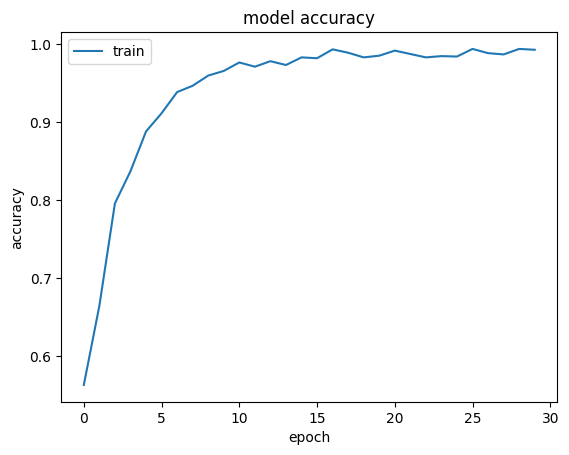

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

15/15 [==============================] - 4s 106ms/step - loss: 0.2964 - accuracy: 0.9132
Loss = 0.29640525579452515
Test Accuracy = 0.9132320880889893


Input image shape: (1, 224, 224, 3)


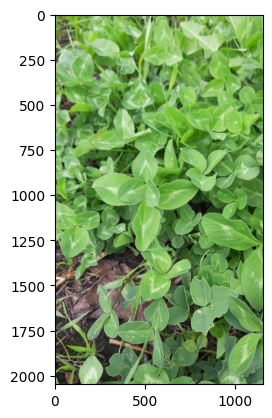

In [ ]:

from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = '/red_clover_922.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

yolo = np.expand_dims(img/255, axis=0)
yolo = preprocess_input(yolo)

print('Input image shape:', yolo.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
yhat = model.predict(np.expand_dims(img/255, 0))
yhat

1/1 [==============================] - 0s 32ms/step


array([[2.0311358e-04, 9.9979693e-01]], dtype=float32)

In [ ]:
if yhat[0][1] > yhat[0][0]:
    print("Image is without any flower")
else:
    print("Image is with flowers")

Image is without any flower


In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
model.save(os.path.join('models','classyboy'))

In [ ]:
!zip -r /content/models/classyboy.zip /content/models/classyboy

  adding: content/models/classyboy/ (stored 0%)
  adding: content/models/classyboy/fingerprint.pb (stored 0%)
  adding: content/models/classyboy/assets/ (stored 0%)
  adding: content/models/classyboy/saved_model.pb (deflated 91%)
  adding: content/models/classyboy/keras_metadata.pb (deflated 96%)
  adding: content/models/classyboy/variables/ (stored 0%)
  adding: content/models/classyboy/variables/variables.index (deflated 76%)
  adding: content/models/classyboy/variables/variables.data-00000-of-00001 (deflated 8%)
